In [1]:
# This notebook will be used for Capstone Data Science Coursera final project


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import dateutil
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
mpl.style.use('ggplot') 
%matplotlib inline

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
#1. Description & Disscusion of the Background
#With the global pandemic of Covid -19 in this year that has strike the world,
#i decide to made the final project to show the advance from the start of this year (January) to this day (August) 
#through the data collected from my country , also made a world data and compare it and  made a prediction for the next month (September) for whta we can expect.

In [5]:
#2. Data Description
#In this process I was able to get data from my country , which has all thata happen from January to August .
#Also I get World wide data which will be used

In [6]:
!wget https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv

--2020-08-27 01:00:37--  https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11280 (11K) [text/plain]
Saving to: ‘estadisticasUY.csv’

100%[======================================>] 11,280      --.-K/s   in 0s      

2020-08-27 01:00:37 (53.5 MB/s) - ‘estadisticasUY.csv’ saved [11280/11280]



In [8]:
df_U= pd.read_csv("estadisticasUY.csv")
df_U.head()

,fecha,dia,cantPersonasConInfeccionEnCurso,cantCasosNuevos,acumCasos,cantFallecidos,acumFallecidos,cantCTI,cantCI,cantRecuperados,acumRecuperados,cantTest,acumTest,cantTestPositivos,acumTestPositivos,DIA
0,13/03/2020,1,4,NaN,4,0,0,0.0,0.0,0,0,NaN,NaN,4,4,5_VIERNES
1,14/03/2020,2,6,2.0,6,0,0,0.0,0.0,0,0,NaN,NaN,2,6,6_SABADO
2,15/03/2020,3,8,2.0,8,0,0,0.0,0.0,0,0,NaN,NaN,2,8,7_DOMINGO
3,16/03/2020,4,29,21.0,29,0,0,0.0,0.0,0,0,NaN,NaN,21,29,1_LUNES
4,17/03/2020,5,50,21.0,50,0,0,0.0,0.0,0,0,NaN,NaN,21,50,2_MARTES


In [9]:
df = df_U.fillna(0)
df = df_U[['fecha','cantCasosNuevos','cantRecuperados','cantFallecidos']]
all(isinstance(column, str) for column in df.columns) 
df= df.rename(columns={'cantCasosNuevos':'New Cases','fecha':'Date','cantRecuperados':'Recover','cantFallecidos':'Deaths'})

#Convert time to  datetime64[ns] and usit as index
dt =pd.to_datetime(df['Date'])
df['Date'] = dt
df= df.set_index('Date')
df.dtypes


New Cases    float64
Recover        int64
Deaths         int64
dtype: object

In [10]:
#Rename columns name
df= df.rename(columns={'cantCasosNuevos':'New Cases','fecha':'Date','cantRecuperados':'Recover','cantFallecidos':'Deaths'})


Text(0.5, 1.0, 'Uruguay Covid-19')

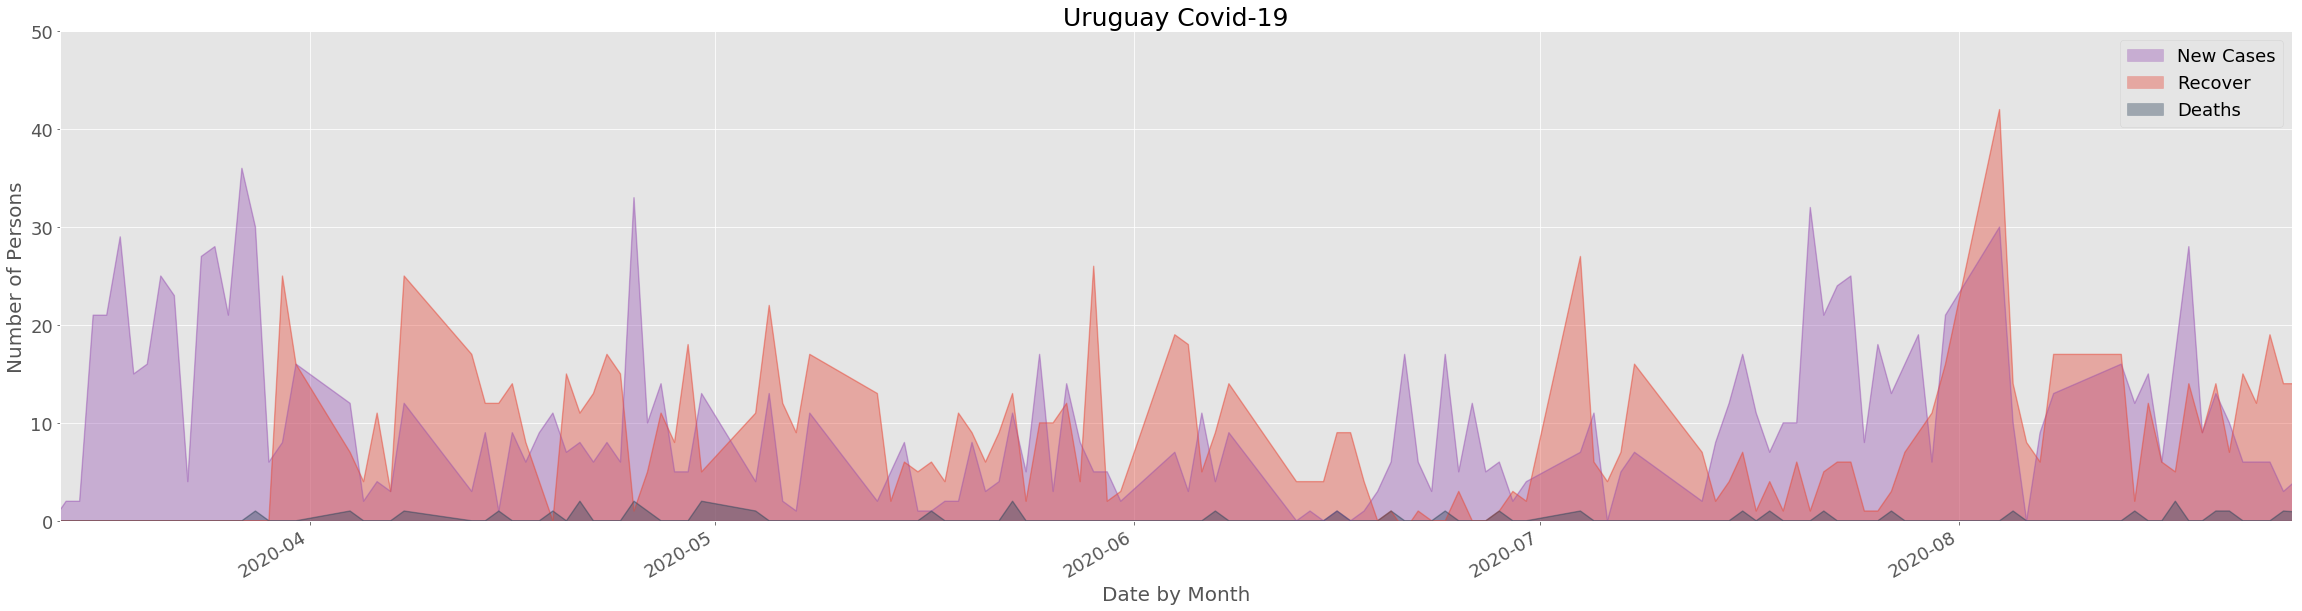

In [11]:
#Datetime for x coord
start_time = pd.to_datetime('202003131300')
end_time = pd.to_datetime('202008251500')
#Plotting 
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
df.plot(kind='area',
        stacked=False,
        figsize=(40,10),
        alpha=0.4,
        color=pal,
        fontsize=18,
       xlim=[start_time, end_time], ylim=[0,50])
        
plt.xlabel('Date by Month',fontsize=20)
plt.ylabel('Number of Persons' , fontsize=20)
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19' , fontsize=25)


In [19]:
df_t = df_U[['fecha','cantTestPositivos','cantTest']]
all(isinstance(column, str) for column in df.columns) 
df_t= df_t.rename(columns={'cantTestPositivos':' Positive Test','fecha':'Date','cantTest':'Test Perform'})
df_t = df_t.fillna(0)

df_t.dtypes
df_t.head()

,Date,Positive Test,Test Perform
0,13/03/2020,4,0.0
1,14/03/2020,2,0.0
2,15/03/2020,2,0.0
3,16/03/2020,21,0.0
4,17/03/2020,21,0.0


In [26]:
df_t= df_t.set_index('Date')
#Plotting 
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
df_t.plot(kind='line',
        figsize=(40,10),
        alpha=0.4,
        color=pal,
        fontsize=18,
        linewidth=3,
        )
        
plt.xlabel('Date')
plt.ylabel('Tests Performed ')
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19  - Tests Perform against Positive Tests')

KeyError: 'Date'

In [25]:
df_te = df_U[['fecha','cantTestPositivos']]
df_te= df_te.rename(columns={'cantTestPositivos':' Positive Test','fecha':'Date'})
df_te = df_te.fillna(0)
df_te= df_te.set_index('Date')

Text(0.5, 1.0, 'Uruguay Covid-19  - Positiv Tests')

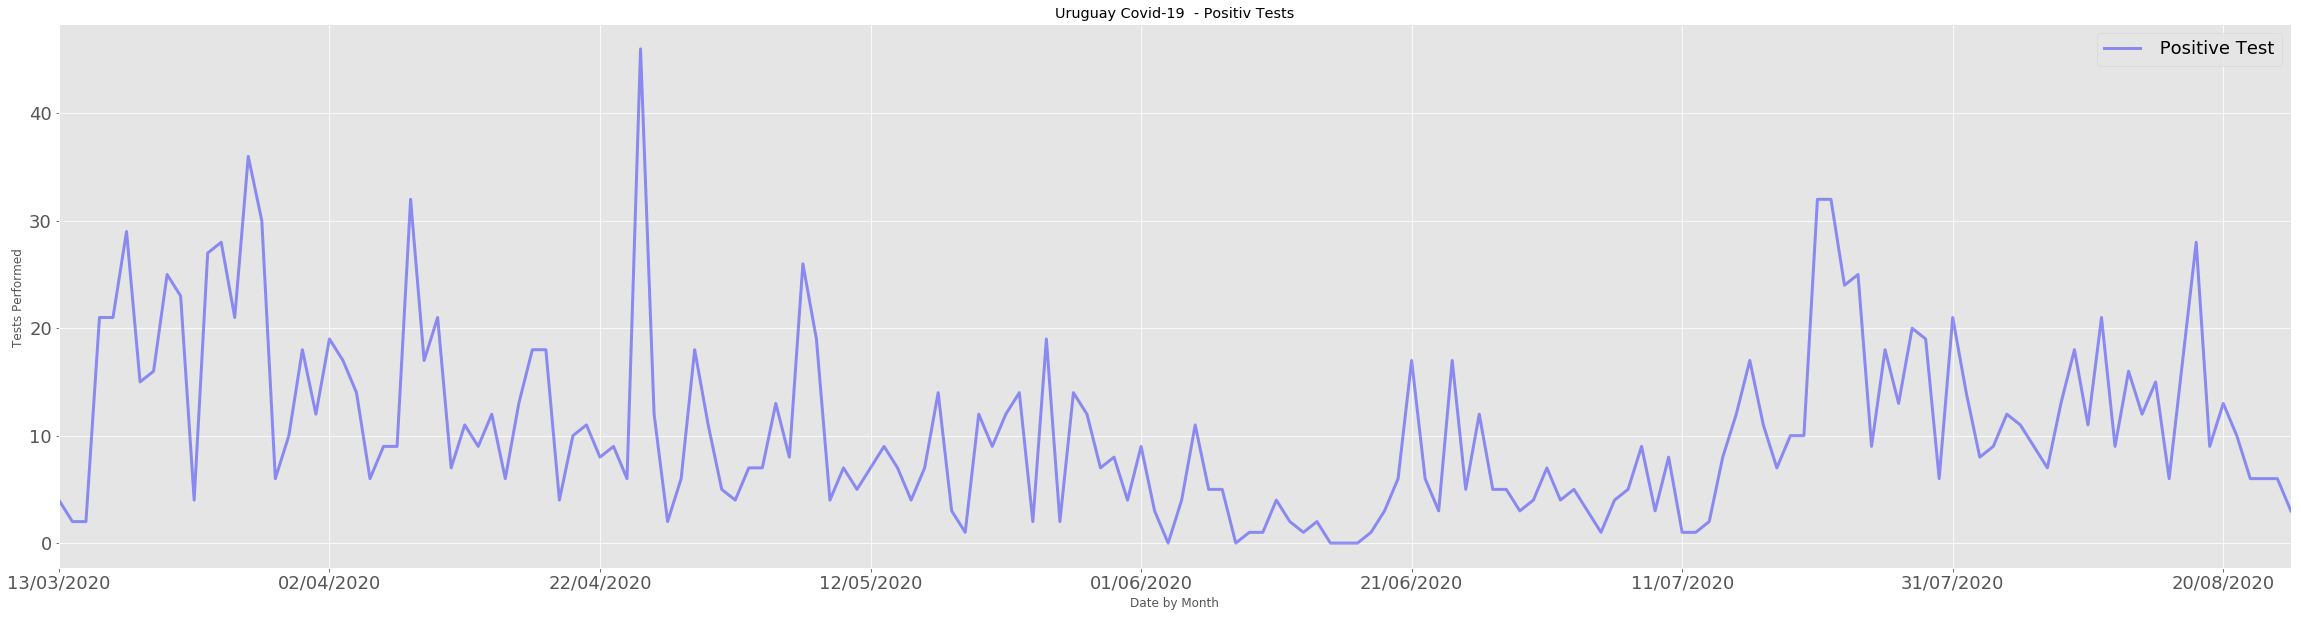

In [23]:

#Plotting 

df_te.plot(kind='line',
        figsize=(40,10),
        alpha=0.4,
        color='Blue',
        fontsize=18,
        linewidth=3,
        )
        
plt.xlabel('Date ')
plt.ylabel('Tests Performed ')
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19  - Positiv Tests')